# PSF Finder for One Order of NEID Dataset
## OSETI
### Alicia Roberts
_3/16/23_

## importing libraries and data set 

In [2]:
from scipy.optimize import curve_fit
import random

from astropy.io import fits
import numpy as np
import scipy.interpolate
from scipy.interpolate import splev, splrep

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("C:\\Users\\alica\\workspace\\Intro-2-Spectra\\analysis\\NEID_analysis\\tau_ceti_shifted_spectrum.zip")
pd.set_option('display.max_rows', 10)
display(data)

,Unnamed: 0,shifted wavelength,shifted flux
0,0,5837.733295,0.950702
1,1,5837.752767,0.930930
2,2,5837.772240,1.008261
3,3,5837.791713,0.942884
4,4,5837.811185,1.003895
...,...,...,...
5601,5601,5947.824252,0.994086
5602,5602,5947.844092,0.963288
5603,5603,5947.863932,1.009402
5604,5604,5947.883772,1.008527


In [5]:
wl = data['shifted wavelength'].to_numpy()
fl = data['shifted flux'].to_numpy()

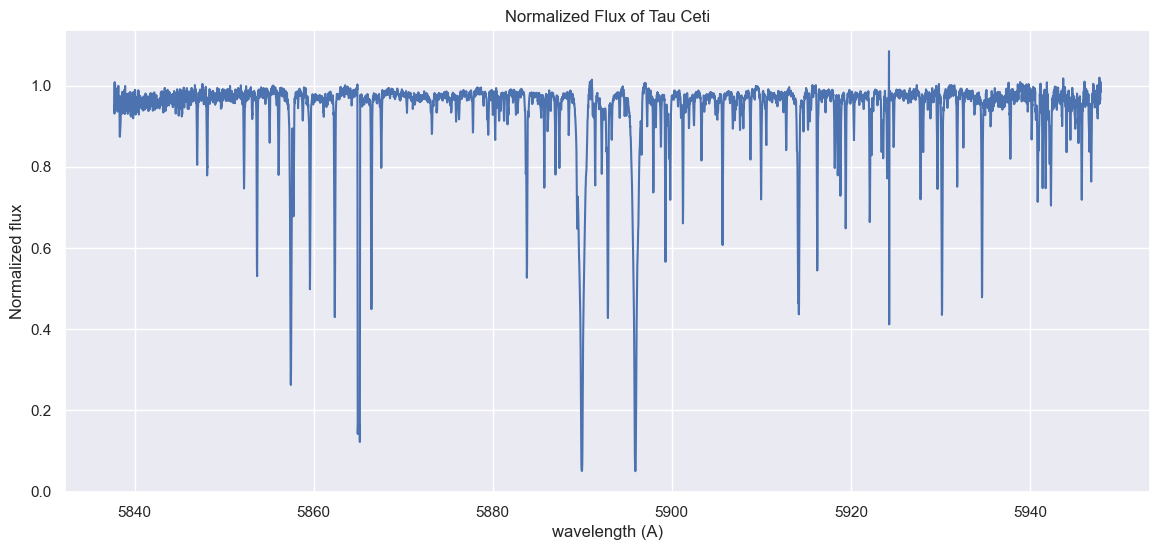

In [6]:
plt.figure(figsize = (14,6))
plt.plot(wl,fl)
plt.xlabel('wavelength (A)')
plt.ylabel('Normalized flux')
plt.title('Normalized Flux of Tau Ceti')
#plt.xlim(5884,5902)
plt.show()

## Data Analysis and Manipulation:

In [8]:
#finding the index values for the given graph above:
wl_range = wl
fl_range = fl

# for i in np.arange(len(wl)):
#     if wl[i] >= 5830 and wl[i] <= 5910:
#         wl_range.append(wl[i])
#         fl_range.append(fl[i])
        
# wl_range = np.array(wl_range)
# fl_range = np.array(fl_range)
min(wl), max(wl)

(5837.7332946026745, 5947.903612049912)

In [9]:
#some usage notes: np.argmin and np.argmax return the INDEX of the max or min in a range, not the value 

In [10]:
def find_minima(x,y): #x is the input, y is the output, returns two arrays, first being the min x values and second being min y values 
    min_x = []
    min_y = []
    for i in np.arange(1,len(x)-1):
        if y[i] < 0.90:
            if y[i-1] > y[i] and y[i] < y[i+1]:
                min_x.append(x[i])
                min_y.append(y[i])
    return min_x, min_y


In [11]:
# def find_maxima(x,y): #does the same thing as the other thing, but builds off of find_min()
#     ''' returns an array of len 2 arrays, with each being the endpoints of the gaussian fit, to then fit these to 
#     gaussians, you would just run a quick for loop to add the values from the raw data for this given range and then fit that to the gaussian.'''
#     min_x, min_y = find_minima(x,y) #finds minima and assigns it to an array for comparison
#     max_x = []
#     max_y = []
#     for mins in min_x: #for each range between minima, it finds to first and last maxima in that array, this will create the neighboring maxima for curve fitting
#         temp_max_x = [] #these are temporaray arrays of maxima that will be emptied between each maxima 
#         temp_max_y = []
#         for i in np.arange(1,len(x)):
#             if x[i] < mins and x[i] > max_x[-1]: #found the error 
#                 if y[i-1] < y[i] and y[i] > y[i+1]:
#                     temp_max_x.append(x[i])
#                     temp_max_y.append(y[i])
#         max_x.append(temp_max_x[0])#,temp_max_x[-1]]) #to attach them as separate arrays, append it as an array 
#         # max_x.append(temp_max_x[-1])
#         max_y.append([temp_max_y[0],temp_max_y[-1]])
#         # max_y.append(temp_max_y[-1])
#     return max_x, max_y

    
                 

In [12]:
def find_maxima(x,y): #not working
    minx, miny = find_minima(x,y)
    
    x_left  = []
    x_right = []
    
    y_left  = []
    y_right = []
    
    for mins in minx:
        tempx_left = []
        tempx_right = []
        tempy_left = []
        tempy_right = []
        
        for i in np.arange(1,len(x)-1):
            if x[i] < mins:
                if x[i-1] < x[i]: #and x[i] > x[i+1]:
                    tempx_left.append(x[i])
                    tempy_left.append(y[i])
            if x[i] > mins: 
                if x[i-1] < x[i]: #if x[i-1] < x[1] and :
                    tempx_right.append(x[i])
                    tempy_right.append(y[i])
        x_left.append(tempx_left[-1]) 
        y_left.append(tempy_left[-1])
        #print(tempx_right)
        x_right.append(tempx_right[0])
        y_right.append(tempx_right[0])
    return x_right, y_right, y_left
                                

In [13]:
wl_min, fl_min = find_minima(wl_range,fl_range)
#wl_min

In [14]:
#wl_max, fl_max = find_maxima(wl_range,fl_range) #taking too long to run -- run some tests:

# x = np.linspace(1,100,100) - 50
# y =  x**3 #to be concave down, should have one maximum 


# max_x , max_y = find_maxima(x,y)
# max_x #returns nothing 
# find_maxima(wl_range, fl_range)

In [15]:
def temporary_fit_range(x,y): #returns x fit values, y fit values, amplitude, mean, and std 
    minx, miny = find_minima(x,y)
    range_x = []
    range_y = []
    
    for mins in minx:
        tempx_range = []
        tempy_range = []
        for i in np.arange(len(x)):
            if mins == x[i]:
                tempx_range = x[i-10:i+10]
                tempy_range = y[i-10:i+10]
        range_x.append(tempx_range)
        range_y.append(tempy_range)
        
        
    amps = miny 
    
    means = minx
    
    stds = [(range_x[1][0] - x[0])/3] 
    for i in np.arange(1,len(range_x)):
        stds.append(range_x[i][-1]- range_x[i][0])
        #stds.append(ranges[1] - ranges[0])

    return range_x, range_y, amps, means, stds

 #above this point is not broken

In [16]:
x_ranges, y_ranges, amps, means, stds  = temporary_fit_range(wl_range, fl_range)
#the first data point is kinda shit, so we are gonna drop it 

x_ranges = x_ranges[1::]
y_ranges = y_ranges[1::]
amps = amps[1::]
means = means[1::]
stds = stds[1::]

In [17]:
#checking array lengths:

len(amps) == len(means) == len(x_ranges) == len(y_ranges) == len(stds)

True

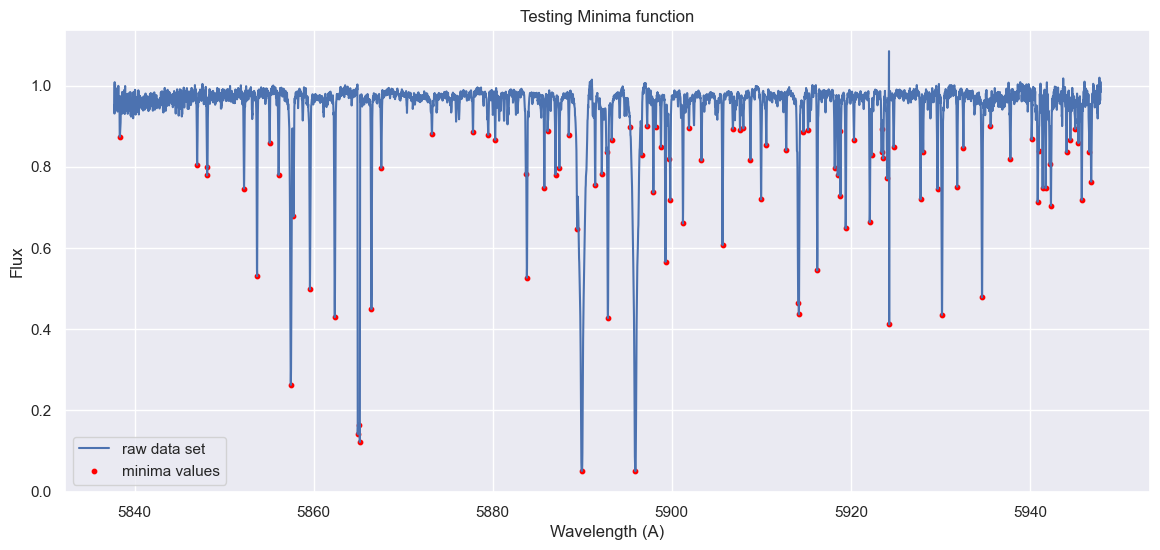

In [18]:
plt.figure(figsize = (14,6))
plt.plot(wl_range,fl_range, label = 'raw data set')
plt.scatter(wl_min,fl_min,s = 10, c = 'red',label = 'minima values')
#plt.plot(wl_max[2],fl_max[2], c = 'green',label = 'maxima values')

plt.legend()
plt.title('Testing Minima function')
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')
plt.show()

 There are some noticeable issues with this fitting technique, namely that the maxima arent exactly where I want them, but for the sake of progression, this will be dealt with later and as long as my later code is as general as possible this shouldnt cause issues down the line 

## Curve Fitting 

$ gaussian = -a e^{-(x-b)^2/(2c^2)}$

In [19]:
#these functions arent created in chronoligcal order of use, but of creation, so that the most important functions are at the top 

In [20]:
def gaussian(x,a, b, c):
    '''a is amplitude, b is  the mean (where i think it is), c is standard deviation (sqrt(variance))''' 
    #offset = x[0] #good estimate
    return -a*np.e**(-(x-b)**2/(2*c**2))  +1 # + offset 

In [21]:
# def find_initial_guess(x,y):
#     minx, miny = find_minima(x,y)
#     miny = np.array(miny)
#     amp = 1 - miny  #depth of minima 
    
#     mean = minx # wl of min 
    
#     std = []
#     for x in np.arange(len(minx)-1):
#         diff = (minx[x+1] - minx[x])/4
#         std.append(diff)
#     std.append(np.mean(diff)) #for the sake of keeping the arrays the same length. will fix later if time and shows significant error
        
#     return amp, mean, std
        
        

In [22]:
p0 = [amps, means, stds]


In [23]:
b_fit, cov = curve_fit(gaussian,x_ranges[0], y_ranges[0], p0 = [amps[0],means[0],stds[0]],absolute_sigma=True)


In [24]:
b_fit

array([1.77053252e-01, 5.84699283e+03, 5.42275371e-02])

In [25]:
gaussian_1 = gaussian(x_ranges[0],b_fit[0],b_fit[1],b_fit[2])
gaussian_1

array([0.99977105, 0.99920329, 0.99756391, 0.99345495, 0.98454892,
       0.96794984, 0.94158472, 0.90644932, 0.86835902, 0.83723597,
       0.82317311, 0.83120476, 0.85842273, 0.89566074, 0.93243492,
       0.96155706, 0.98078103, 0.99155767, 0.99674154, 0.99889495])

PSF for this curve fit is: 0.05422753705815282 Angstroms


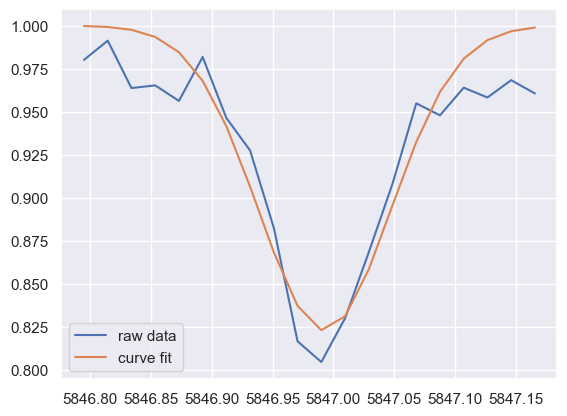

In [26]:
plt.plot(x_ranges[0], y_ranges[0], label = 'raw data')
plt.plot(x_ranges[0], gaussian_1, label = 'curve fit')
plt.legend()
print('PSF for this curve fit is:' , b_fit[2], 'Angstroms')


#might want to add an offset, where it is 1 - first value of range (for approximation) 

alright, this is proof that the fit is working!

In [27]:
def find_psf(val, skips): #val is an integer, where you would like to begin curve fitting again
    psf = []
    for i in np.arange(val, val + skips):
        fit,cov = curve_fit(gaussian,x_ranges[i], y_ranges[i], p0 = [amps[i],means[i],stds[i]],absolute_sigma=True)
        psf.append(fit[2])
    return psf

In [28]:
small_amount_psfs = np.array(b_fit[2]) #theres a bug with negative values
small_amount_psfs = np.append(small_amount_psfs, find_psf(1, 30))
small_amount_psfs = np.append(small_amount_psfs, find_psf(32, 2)) 
small_amount_psfs = np.append(small_amount_psfs, find_psf(35,18))
small_amount_psfs = np.append(small_amount_psfs, find_psf(56,11))
small_amount_psfs = np.append(small_amount_psfs, find_psf(68,29))

# small_amount_psfs = abs(small_amount_psfs) 
small_amount_psfs
values = np.arange(1,30)
values = np.append(values, np.arange(32,2+32))
values = np.append(values, np.arange(35,35+18))
values = np.append(values, np.arange(56,56+11))
values = np.append(values, np.arange(68,68+29))
values
np.arange(32,2+34)

array([32, 33, 34, 35])

## Histogram

In [29]:
len(amps)

97

In [30]:
psf_data_test = {'PSF Values with (5837.73, 5947.90) A Wavlength Range': small_amount_psfs}
psf_test = pd.DataFrame(data = psf_data_test)

array([[<AxesSubplot:title={'center':'PSF Values with (5837.73, 5947.90) A Wavlength Range'}>]],
      dtype=object)

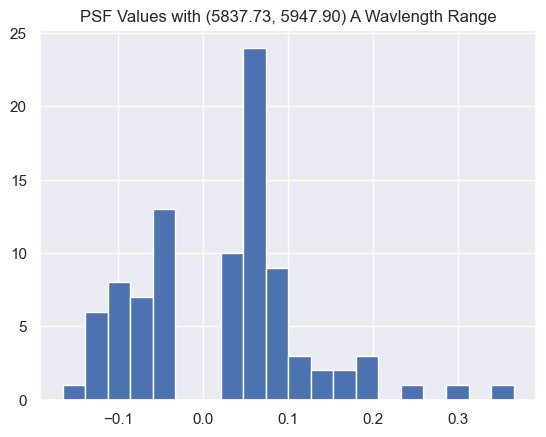

In [31]:
psf_test.hist(bins = 20)

 Working, with minor bug of occasional negative PSF

In [32]:
# testing negative gaussian stds: 
j = 5 #index of gaussian fit to test
fit2,cov = curve_fit(gaussian,x_ranges[j], y_ranges[j], p0 = [amps[j],means[j],stds[j]],absolute_sigma=True)
gaussian_2 = gaussian(x_ranges[j],fit2[0],fit2[1],fit2[2])

the standard deviation for this fit is: -0.0480523033380977


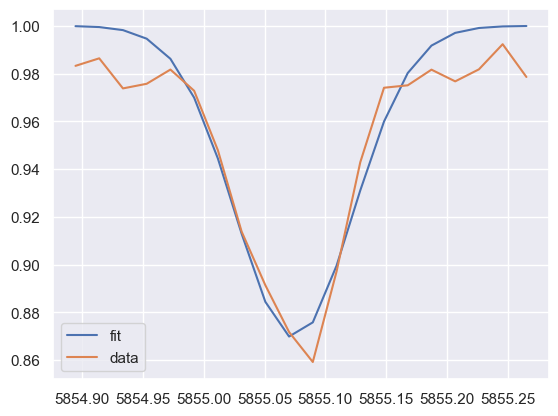

In [33]:
plt.plot(x_ranges[j],gaussian_2, label = 'fit')
plt.plot(x_ranges[j],y_ranges[j], label = 'data')
plt.legend()
print('the standard deviation for this fit is:', fit2[2])

## Next Steps and Things to Work on 

1. negative standard deviation and seeing if theyre gaussian candidates or not 
2. fitting for a wider wavelength range (would have to go back to other notebook
3. plot fits to check validity 
    >account for offset for clear plotting 
4. Debugging techniques


For Monday:

1. try and do this for another star
2. make two histograms, one that is wavelength dependent and one that is pixel dependent.

In [34]:
# testing with plotting:

In [43]:
test_values = []
for i in np.arange(len(small_amount_psfs)):
    if small_amount_psfs[i] < 0:
        test_values.append(i)

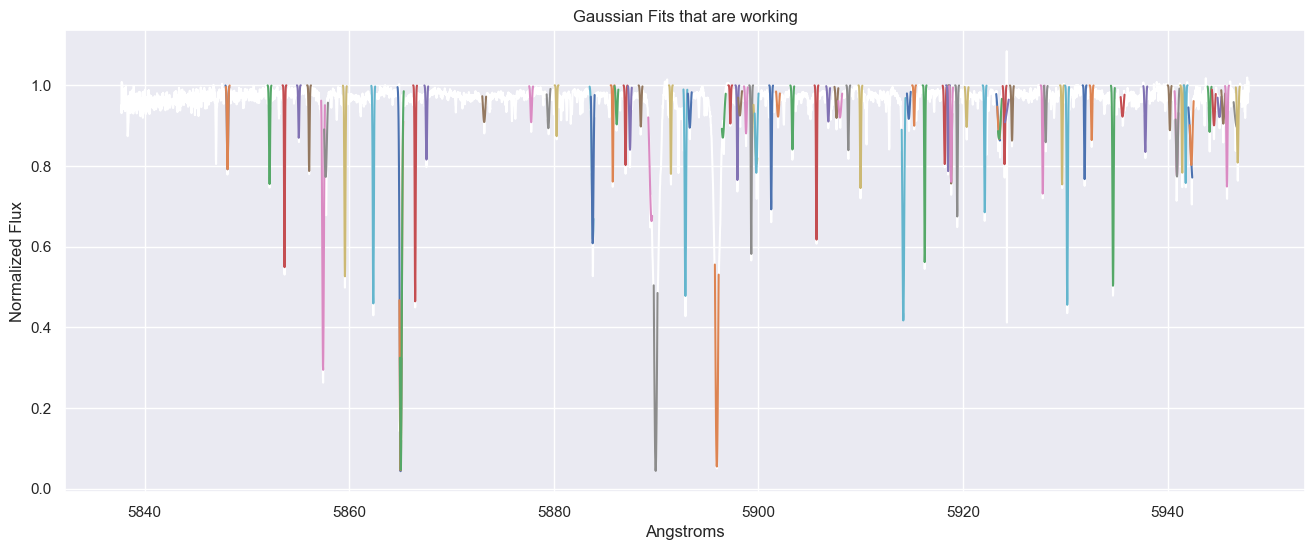

the following gaussians are negative sigma valued: [5, 9, 12, 16, 18, 19, 20, 23, 28, 32, 37, 38, 42, 43, 48, 50, 51, 52, 53, 58, 59, 60, 61, 67, 68, 69, 70, 73, 74, 75, 77, 84, 85, 86, 87]


In [57]:
plt.figure(figsize = (16,6))
plt.plot(wl,fl, color = 'white')

for j in values:
    fit2,cov = curve_fit(gaussian,x_ranges[j], y_ranges[j], p0 = [amps[j],means[j],stds[j]],absolute_sigma=True)
    gaussian_2 = gaussian(x_ranges[j],fit2[0],fit2[1],fit2[2])
    plt.plot(x_ranges[j],gaussian_2)
    
    
plt.title('Gaussian Fits that are working') 
plt.xlabel('Angstroms')
plt.ylabel('Normalized Flux') 
plt.show()
print('the following gaussians are negative sigma valued:', test_values)

this is a strong indication that my fits arent good

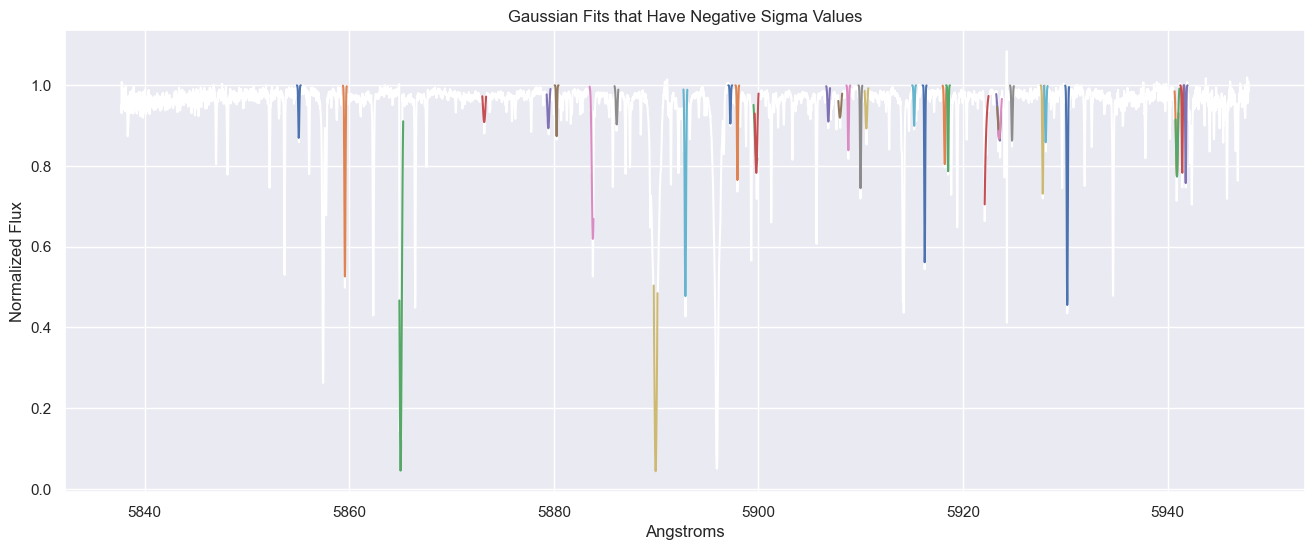

In [58]:
plt.figure(figsize = (16,6))
plt.plot(wl,fl, color = 'white')

for j in test_values:
    fit2,cov = curve_fit(gaussian,x_ranges[j], y_ranges[j], p0 = [amps[j],means[j],stds[j]],absolute_sigma=True, maxfev = 800000)
    gaussian_2 = gaussian(x_ranges[j],fit2[0],fit2[1],fit2[2])
    plt.plot(x_ranges[j],gaussian_2)
plt.title('Gaussian Fits that Have Negative Sigma Values')
plt.xlabel('Angstroms')
plt.ylabel('Normalized Flux') 
plt.show()



## Testing with Limitations to Identify Errors

In [91]:
threshold = 0.1 #min flux must be less 
min_fl= []
min_wl = []
#finding minima that fit within the threshold:
for i in np.arange(len(wl_range)):
    if fl[i] < threshold: #assiming minima dont lie at endpoints 
        if fl[i-1] > fl[i] and fl[i] < fl[i+1]:
            min_fl.append(fl[i])
            min_wl.append(wl[i])

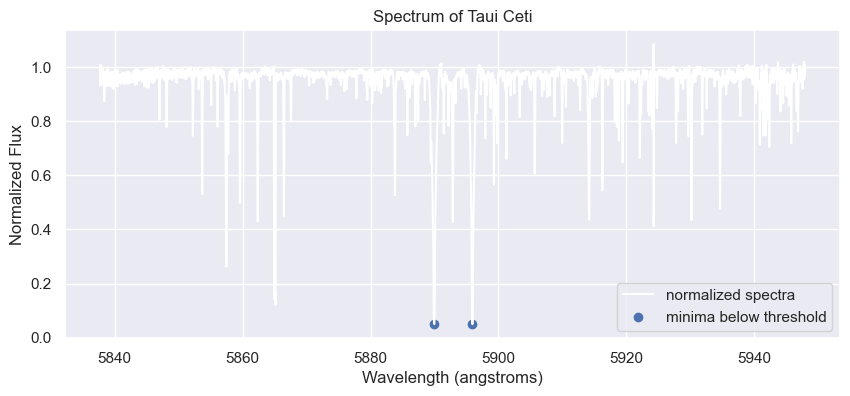

threshold of flux below 0.1


In [92]:
plt.figure(figsize = (10,4))
plt.plot(wl, fl, c = 'white', label = 'normalized spectra')
plt.scatter(min_wl, min_fl, label = 'minima below threshold')
plt.title('Spectrum of Taui Ceti')
plt.xlabel('Wavelength (angstroms)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()
print('threshold of flux below ' + str(threshold))